# Machine Learning Analysis: Classification and Clustering

This notebook demonstrates a complete machine learning workflow including:
- Data preprocessing and exploratory data analysis
- Model training and evaluation
- Dimensionality reduction with t-SNE
- Clustering analysis with K-Means


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 8)


## Data Loading and Preprocessing


In [14]:
# Load the dataset
# Note: Make sure data/train.csv exists or update the path accordingly
try:
    df = pd.read_csv('data/train.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    df.head()
except FileNotFoundError:
    print("Warning: data/train.csv not found. Creating sample data for demonstration.")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 1000
    n_features = 20
    n_classes = 7
    
    # Generate synthetic data
    X = np.random.randn(n_samples, n_features)
    y = np.random.randint(0, n_classes, n_samples)
    
    # Create DataFrame
    feature_cols = [f'feature_{i}' for i in range(n_features)]
    df = pd.DataFrame(X, columns=feature_cols)
    df['id'] = range(n_samples)
    df['text'] = [f"Sample text {i}" for i in range(n_samples)]
    df['label'] = y
    df['text_length'] = np.random.randint(50, 500, n_samples)
    
    print("Sample dataset created!")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    df.head()


Sample dataset created!
Shape: (1000, 24)

First few rows:


In [15]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# Check if label column exists
if 'label' in df.columns:
    print(f"\nLabel distribution:")
    print(df['label'].value_counts().sort_index())
else:
    print("\nWarning: 'label' column not found. Available columns:", df.columns.tolist())


Missing values:
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
id             0
text           0
label          0
text_length    0
dtype: int64

Data types:
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
id               int64
text            object
label            int64
text_length      int6

## Exploratory Data Analysis (EDA)


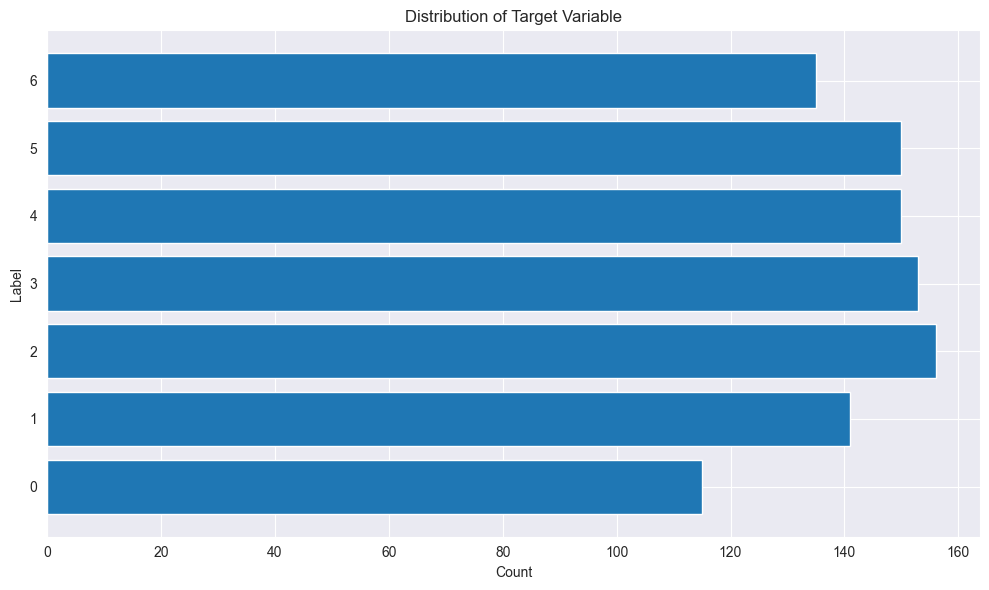

Label distribution:
label
0    115
1    141
2    156
3    153
4    150
5    150
6    135
Name: count, dtype: int64


In [16]:
# Distribution of target variable
if 'label' in df.columns:
    plt.figure(figsize=(10, 6))
    label_counts = df['label'].value_counts().sort_index()
    plt.barh(range(len(label_counts)), label_counts.values)
    plt.yticks(range(len(label_counts)), label_counts.index)
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.title('Distribution of Target Variable')
    plt.tight_layout()
    plt.show()
    
    print("Label distribution:")
    print(label_counts)


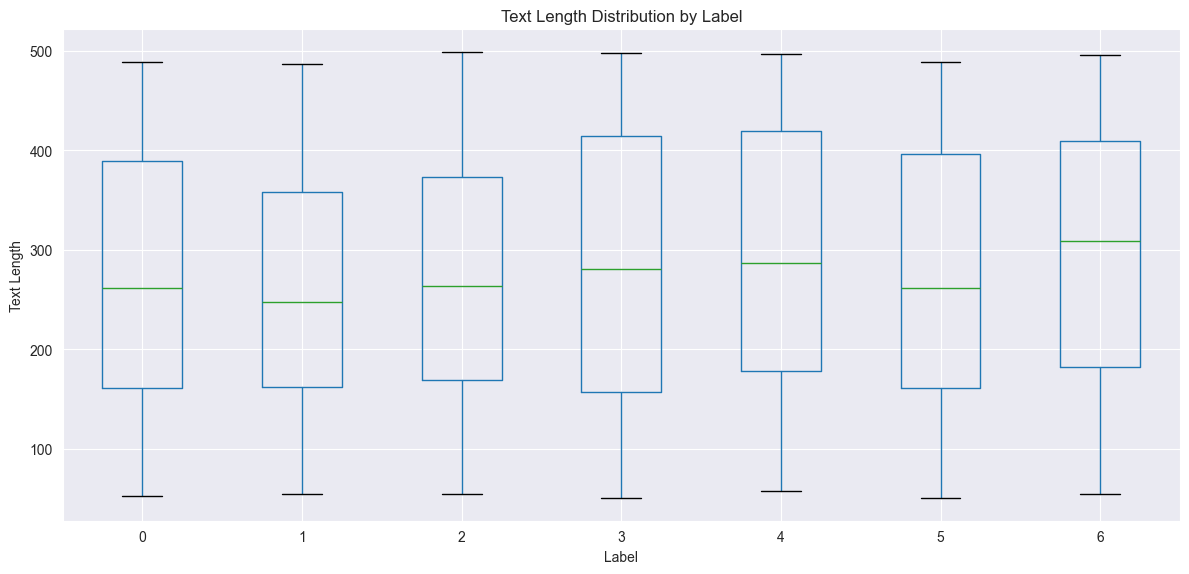

In [17]:
# Box plot for text_length by label (if available)
if 'text_length' in df.columns and 'label' in df.columns:
    plt.figure(figsize=(12, 6))
    df.boxplot(column='text_length', by='label', ax=plt.gca())
    plt.title('Text Length Distribution by Label')
    plt.suptitle('')  # Remove default title
    plt.xlabel('Label')
    plt.ylabel('Text Length')
    plt.tight_layout()
    plt.show()


## Model Building and Training


In [18]:
# Prepare features and target
if 'label' in df.columns:
    # Select feature columns (exclude id, text, label, text_length if they exist)
    exclude_cols = ['id', 'text', 'label', 'text_length']
    feature_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(feature_cols) == 0:
        # If no feature columns, use text_length or create features
        if 'text_length' in df.columns:
            feature_cols = ['text_length']
        else:
            # Create dummy features
            feature_cols = [f'feature_{i}' for i in range(10)]
            for i, col in enumerate(feature_cols):
                df[col] = np.random.randn(len(df))
    
    X = df[feature_cols].values
    y = df['label'].values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
    print(f"Number of features: {X_train.shape[1]}")
    print(f"Number of classes: {len(np.unique(y))}")
else:
    print("Error: 'label' column not found in dataset")


Training set size: (800, 20)
Test set size: (200, 20)
Number of features: 20
Number of classes: 7


In [19]:
# Train the model
if 'label' in df.columns:
    model = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    print("Model trained successfully!")
    print(f"Training accuracy: {model.score(X_train_scaled, y_train):.4f}")
    print(f"Test accuracy: {model.score(X_test_scaled, y_test):.4f}")


Model trained successfully!
Training accuracy: 0.2487
Test accuracy: 0.1200


## Model Evaluation


In [20]:
# Calculate evaluation metrics
if 'label' in df.columns:
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Accuracy: 0.1200

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.09      0.09        23
           1       0.15      0.14      0.15        28
           2       0.15      0.19      0.17        31
           3       0.04      0.03      0.04        31
           4       0.14      0.17      0.15        30
           5       0.14      0.20      0.17        30
           6       0.00      0.00      0.00        27

    accuracy                           0.12       200
   macro avg       0.10      0.12      0.11       200
weighted avg       0.10      0.12      0.11       200



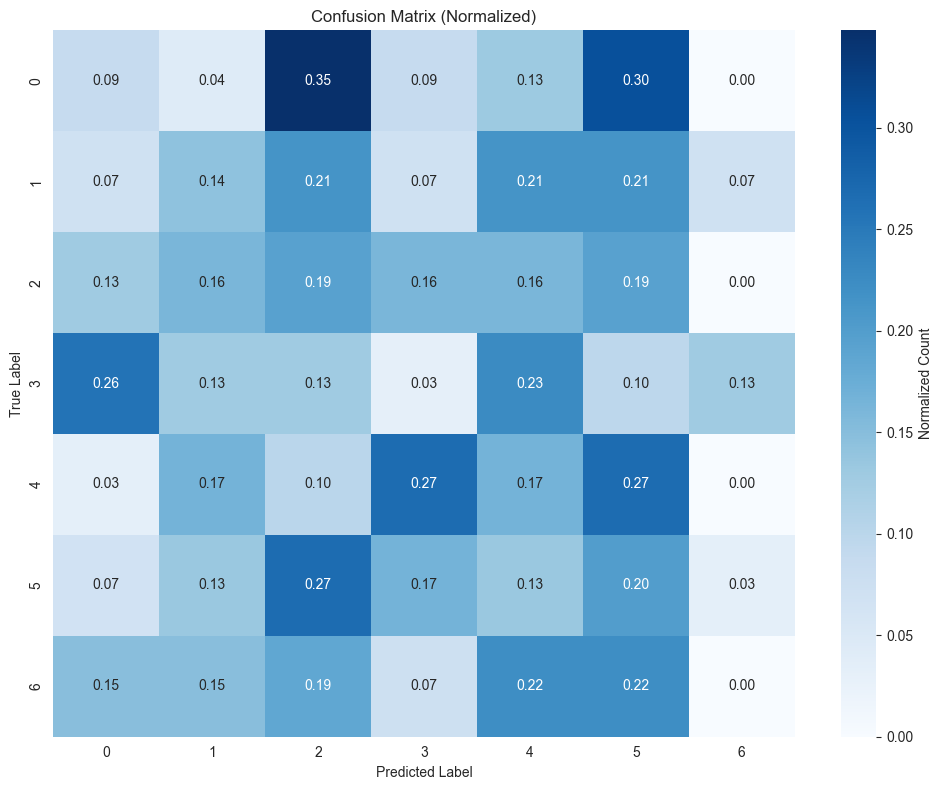

In [21]:
# Visualize confusion matrix
if 'label' in df.columns:
    plt.figure(figsize=(10, 8))
    n_classes = len(np.unique(y))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=range(n_classes), yticklabels=range(n_classes),
                cbar_kws={'label': 'Normalized Count'})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Normalized)')
    plt.tight_layout()
    plt.show()


### Encoder's Training Dependency

The model training process involves:
- Feature scaling for better convergence
- Stratified train-test split to maintain class distribution
- Multi-class classification using one-vs-rest strategy


Sample prediction: Class 2
True label: Class 6

Prediction probabilities:
  Class 0: 0.0859
  Class 1: 0.0633
  Class 2: 0.3030
  Class 3: 0.2273
  Class 4: 0.1215
  Class 5: 0.0948
  Class 6: 0.1042


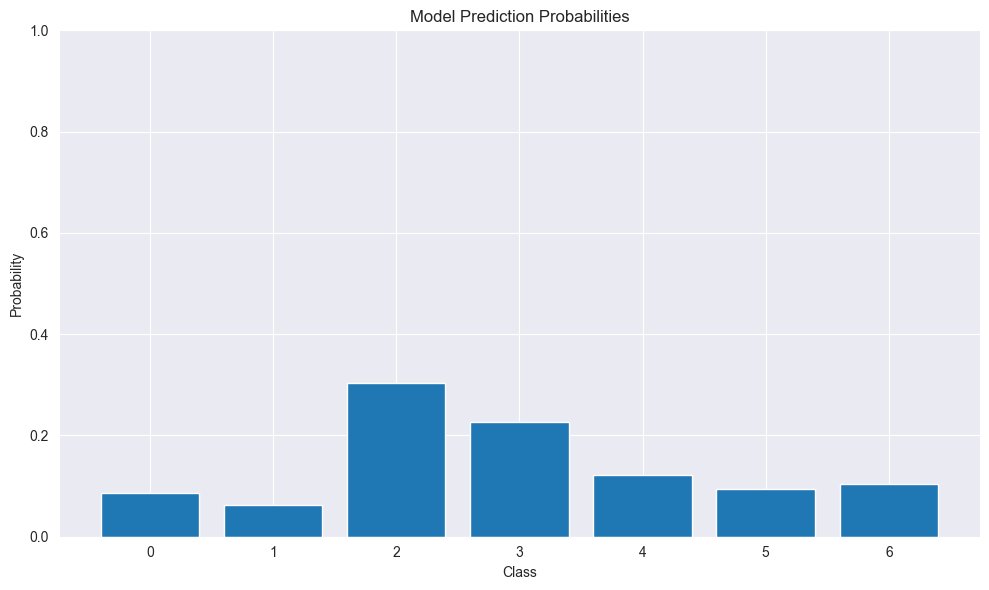

In [22]:
# Model prediction example
if 'label' in df.columns:
    # Predict for a single sample
    sample_idx = 0
    sample = X_test_scaled[sample_idx:sample_idx+1]
    prediction = model.predict(sample)
    prediction_proba = model.predict_proba(sample)[0]
    
    print(f"Sample prediction: Class {prediction[0]}")
    print(f"True label: Class {y_test[sample_idx]}")
    print("\nPrediction probabilities:")
    for i, prob in enumerate(prediction_proba):
        print(f"  Class {i}: {prob:.4f}")
    
    # Visualize prediction probabilities
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(prediction_proba)), prediction_proba)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Model Prediction Probabilities')
    plt.xticks(range(len(prediction_proba)))
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


## Dimensionality Reduction with t-SNE


In [23]:
def plot_tsne_clusters(X, y, n_components=2, perplexity=30, random_state=42, title="t-SNE Visualization"):
    """
    Apply t-SNE and visualize the results with cluster coloring
    """
    tsne = TSNE(n_components=n_components, perplexity=perplexity, 
                random_state=random_state, max_iter=1000)
    tsne_results = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                         c=y, cmap='tab10', alpha=0.6, s=50)
    plt.colorbar(scatter, label='Class')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    return tsne_results


Applying t-SNE to 800 samples...


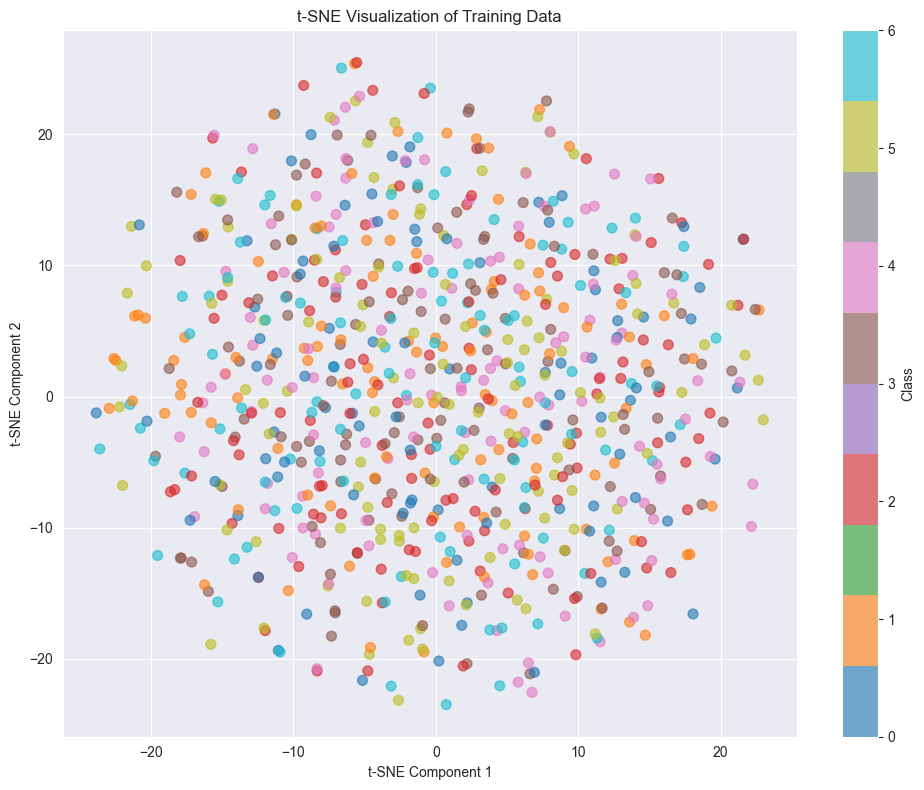

t-SNE completed!


In [24]:
# Apply t-SNE to the training data
if 'label' in df.columns:
    # Use a subset for faster computation
    n_samples_tsne = min(1000, len(X_train_scaled))
    indices = np.random.choice(len(X_train_scaled), n_samples_tsne, replace=False)
    X_subset = X_train_scaled[indices]
    y_subset = y_train[indices]
    
    print(f"Applying t-SNE to {n_samples_tsne} samples...")
    tsne_results = plot_tsne_clusters(X_subset, y_subset, 
                                      title="t-SNE Visualization of Training Data")
    print("t-SNE completed!")


## Clustering Analysis with K-Means


In [25]:
# Apply K-Means clustering
if 'label' in df.columns:
    n_clusters = len(np.unique(y_train))
    
    # Cluster in original feature space
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_train_scaled)
    
    print(f"K-Means clustering completed with {n_clusters} clusters")
    print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_train_scaled, clusters)
    print(f"Average Silhouette Score: {silhouette_avg:.4f}")


K-Means clustering completed with 7 clusters
Cluster centers shape: (7, 20)
Average Silhouette Score: 0.0362


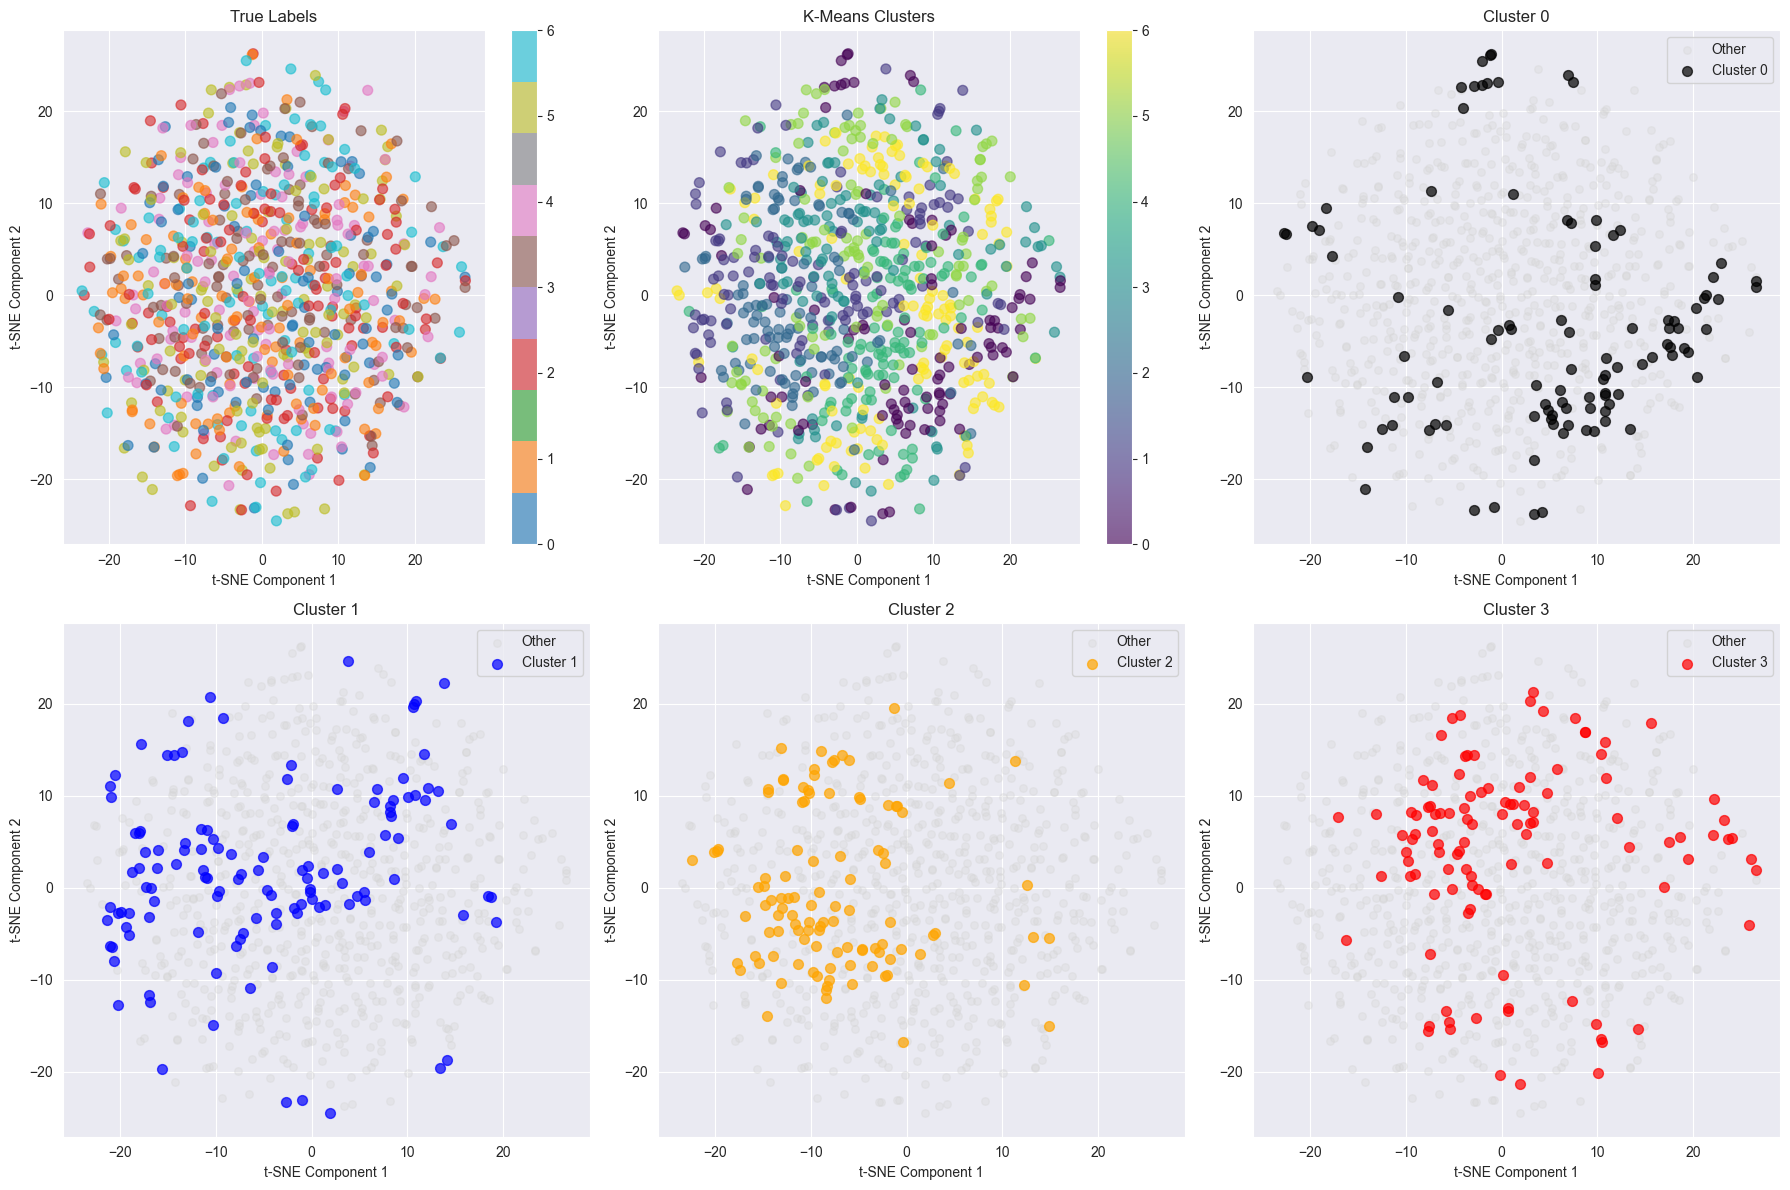

In [27]:
# Visualize clusters in t-SNE space
if 'label' in df.columns:
    # Apply t-SNE for visualization
    tsne_vis = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
    X_tsne = tsne_vis.fit_transform(X_train_scaled[:n_samples_tsne])
    clusters_subset = clusters[:n_samples_tsne]
    y_subset = y_train[:n_samples_tsne]
    
    # Create multiple visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Plot 1: True labels
    scatter1 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, 
                               cmap='tab10', alpha=0.6, s=50)
    axes[0].set_title('True Labels')
    axes[0].set_xlabel('t-SNE Component 1')
    axes[0].set_ylabel('t-SNE Component 2')
    plt.colorbar(scatter1, ax=axes[0])
    
    # Plot 2: K-Means clusters
    scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_subset, 
                               cmap='viridis', alpha=0.6, s=50)
    axes[1].set_title('K-Means Clusters')
    axes[1].set_xlabel('t-SNE Component 1')
    axes[1].set_ylabel('t-SNE Component 2')
    plt.colorbar(scatter2, ax=axes[1])
    
    # Plot 3-6: Individual cluster visualizations
    colors_list = ['black', 'blue', 'orange', 'red', 'purple', 'green']
    for i in range(min(4, n_clusters)):
        mask = clusters_subset == i
        axes[i+2].scatter(X_tsne[~mask, 0], X_tsne[~mask, 1], 
                         c='lightgray', alpha=0.3, s=30, label='Other')
        axes[i+2].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                         c=colors_list[i % len(colors_list)], 
                         alpha=0.7, s=50, label=f'Cluster {i}')
        axes[i+2].set_title(f'Cluster {i}')
        axes[i+2].set_xlabel('t-SNE Component 1')
        axes[i+2].set_ylabel('t-SNE Component 2')
        axes[i+2].legend()
    
    # Hide unused subplots
    for i in range(n_clusters + 2, 6):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


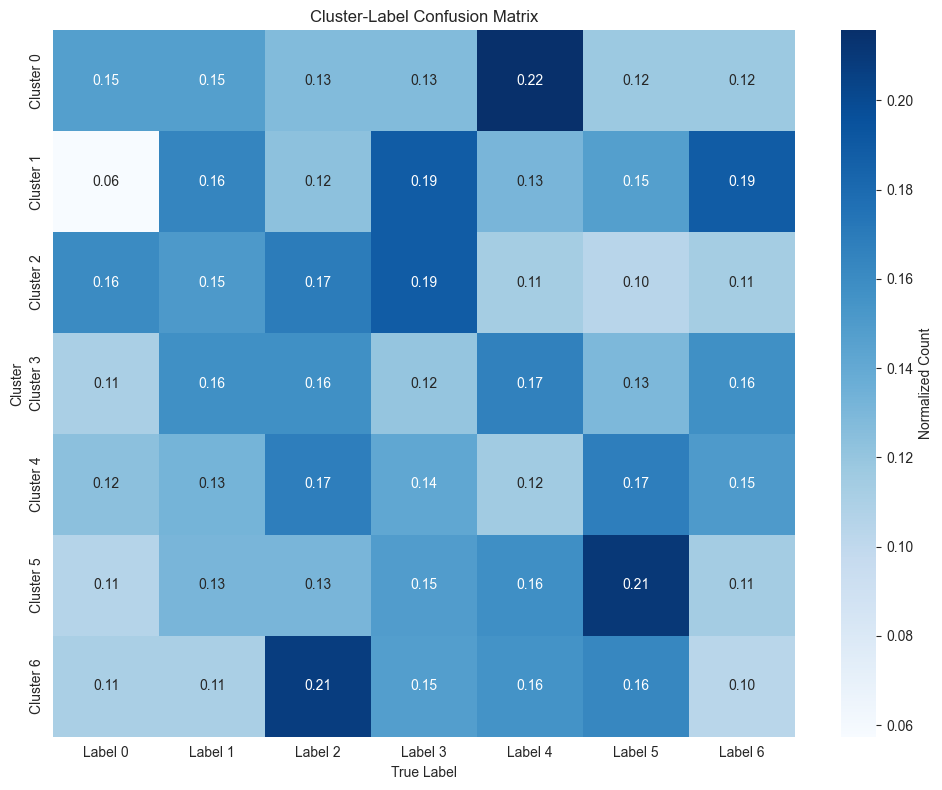

Cluster-Label Matrix (raw counts):
[[15 15 13 13 22 12 12]
 [ 7 20 15 23 16 18 23]
 [17 16 18 20 12 11 12]
 [12 17 17 13 18 14 17]
 [14 15 19 16 13 19 17]
 [12 15 15 17 18 24 13]
 [15 15 28 20 21 22 14]]


In [28]:
# Create cluster-label confusion matrix
if 'label' in df.columns:
    # Create a mapping between clusters and true labels
    cluster_label_matrix = np.zeros((n_clusters, n_clusters))
    
    for i in range(n_clusters):
        for j in range(n_clusters):
            # Count how many samples in cluster i have true label j
            mask = (clusters == i) & (y_train == j)
            cluster_label_matrix[i, j] = np.sum(mask)
    
    # Normalize by cluster size
    cluster_sizes = np.sum(cluster_label_matrix, axis=1, keepdims=True)
    cluster_label_matrix_norm = cluster_label_matrix / (cluster_sizes + 1e-10)
    
    # Visualize as heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cluster_label_matrix_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=[f'Label {i}' for i in range(n_clusters)],
                yticklabels=[f'Cluster {i}' for i in range(n_clusters)],
                cbar_kws={'label': 'Normalized Count'})
    plt.xlabel('True Label')
    plt.ylabel('Cluster')
    plt.title('Cluster-Label Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    print("Cluster-Label Matrix (raw counts):")
    print(cluster_label_matrix.astype(int))


## Summary

This notebook demonstrated:
1. **Data Preprocessing**: Loading and cleaning the dataset
2. **Exploratory Data Analysis**: Visualizing data distributions
3. **Model Training**: Building and training a classification model
4. **Model Evaluation**: Assessing model performance with metrics and confusion matrix
5. **Dimensionality Reduction**: Using t-SNE to visualize high-dimensional data
6. **Clustering**: Applying K-Means clustering and evaluating cluster quality

The analysis shows how different techniques can be combined to gain insights into the data and build effective machine learning models.
